<a href="https://colab.research.google.com/github/bida22-070/BIDA22-070/blob/main/Week8_Machine_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Exercise 2: Install required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print("All libraries imported successfully!")

All libraries imported successfully!


Generated data shape: (300, 2)
True number of clusters: 3
Exercise 3: Basic K-Means with 2 clusters


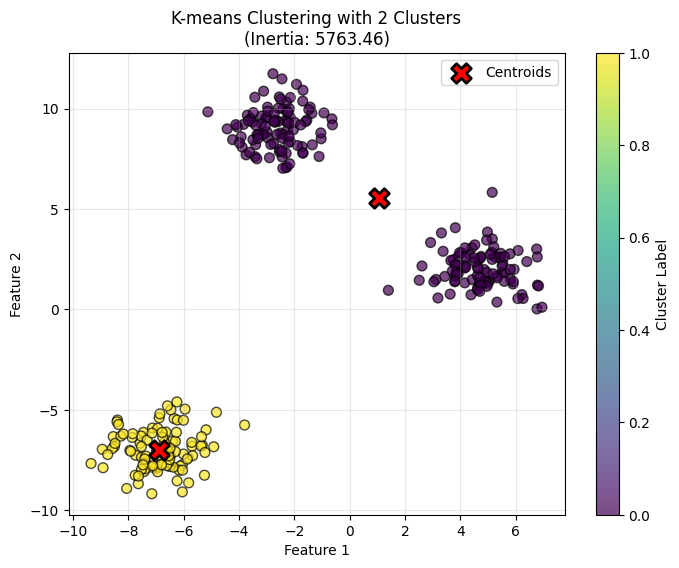

Number of clusters: 2
Inertia (Within-cluster sum of squares): 5763.46
Cluster centers shape: (2, 2)
--------------------------------------------------


In [3]:
# Exercise 3: Basic K-Means algorithm implementation
random_state_value = 42

# Generate random data for clustering
np.random.seed(random_state_value)
data, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

print(f"Generated data shape: {data.shape}")
print(f"True number of clusters: {len(np.unique(true_labels))}")

# Function to perform K-means clustering and plot the results
def plot_kmeans_clusters(data, n_clusters, random_state=42):
    """
    Exercise 4: Understanding the script
    This function:
    1. Creates a KMeans model with specified number of clusters
    2. Fits the model to the data and predicts cluster labels
    3. Plots the data points colored by their cluster assignment
    4. Marks the cluster centers (centroids) with red X markers
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis',
                         edgecolor='k', s=50, alpha=0.7)
    centroids = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                          c='red', marker='X', s=200, label='Centroids',
                          edgecolor='black', linewidth=2)
    plt.title(f'K-means Clustering with {n_clusters} Clusters\n(Inertia: {kmeans.inertia_:.2f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Print some metrics
    print(f"Number of clusters: {n_clusters}")
    print(f"Inertia (Within-cluster sum of squares): {kmeans.inertia_:.2f}")
    print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
    print("-" * 50)

    return kmeans, labels

# Initial clustering with 2 clusters
print("Exercise 3: Basic K-Means with 2 clusters")
kmeans_2, labels_2 = plot_kmeans_clusters(data, n_clusters=2, random_state=random_state_value)

Exercise 5: K-Means with different cluster numbers (2 to 10)


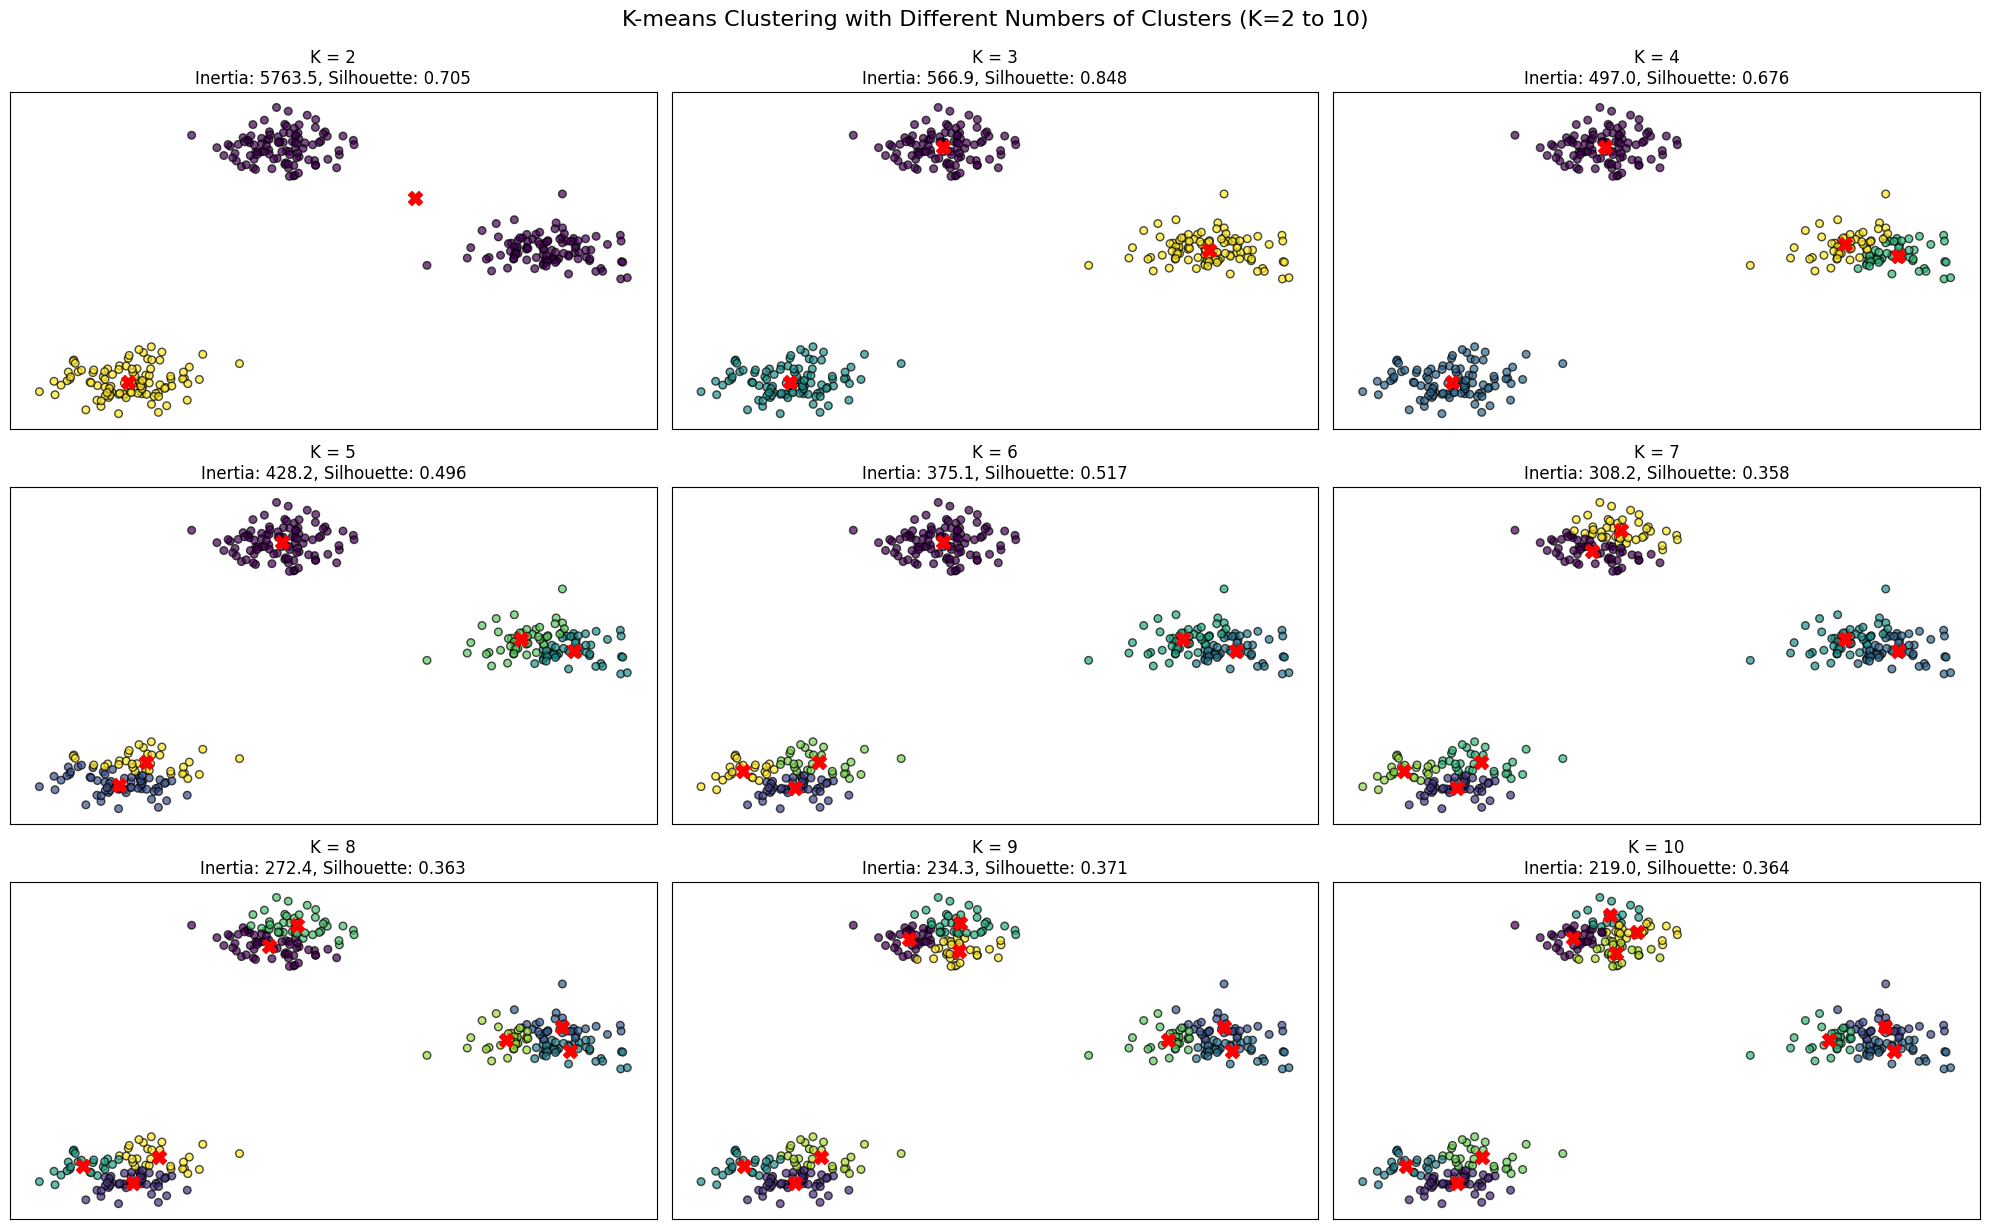

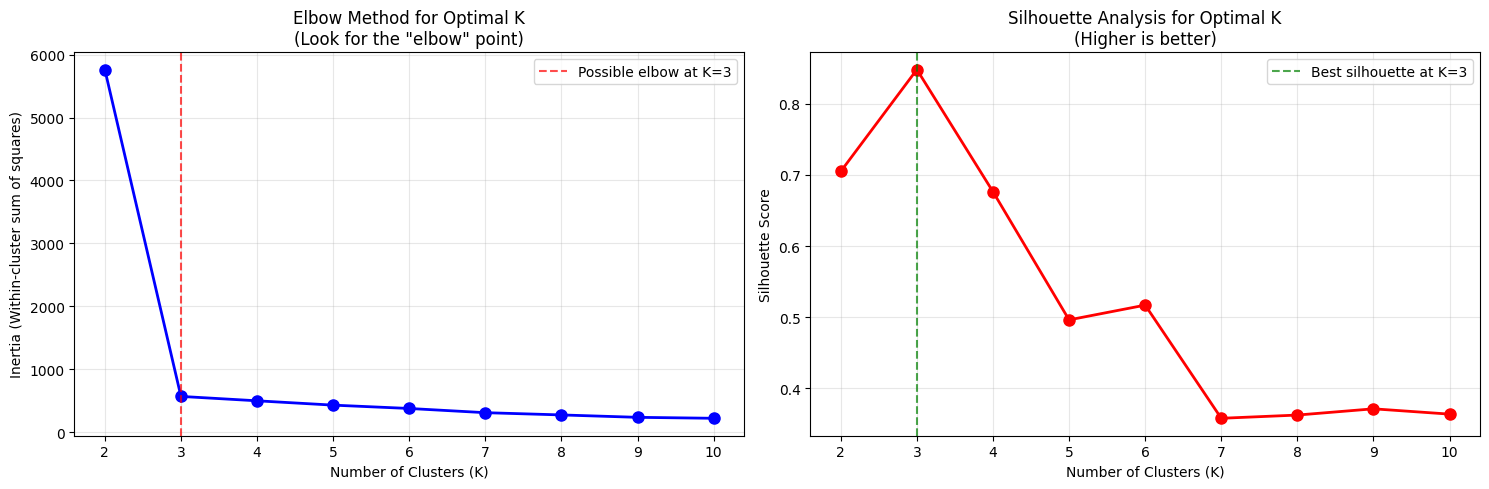

Detailed Metrics:
K	Inertia		Silhouette Score
----------------------------------------
2	5763.46		0.705
3	566.86		0.848
4	497.03		0.676
5	428.21		0.496
6	375.07		0.517
7	308.20		0.358
8	272.41		0.363
9	234.28		0.371
10	219.04		0.364

Analysis:
- Inertia decreases as K increases (expected behavior)
- Possible elbow point around K=3
- Best silhouette score at K=3
- For this synthetic data, K=3 matches the true number of clusters


In [4]:
# Exercise 5: Update the script to cluster with different numbers from 2 to 10
print("Exercise 5: K-Means with different cluster numbers (2 to 10)")

# Calculate and plot for different numbers of clusters
n_clusters_range = range(2, 11)
inertia_values = []
silhouette_scores = []

# Create subplots for all cluster numbers
plt.figure(figsize=(20, 12))

for i, n_clusters in enumerate(n_clusters_range, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state_value)
    labels = kmeans.fit_predict(data)

    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(data, labels)

    inertia_values.append(inertia)
    silhouette_scores.append(silhouette_avg)

    # Plot clustering results
    plt.subplot(3, 3, i)
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis',
                         edgecolor='k', s=30, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=100)
    plt.title(f'K = {n_clusters}\nInertia: {inertia:.1f}, Silhouette: {silhouette_avg:.3f}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.suptitle('K-means Clustering with Different Numbers of Clusters (K=2 to 10)',
             y=1.02, fontsize=16)
plt.show()

# Plot elbow curve and silhouette scores separately
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve (Inertia vs Number of clusters)
ax1.plot(n_clusters_range, inertia_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal K\n(Look for the "elbow" point)')
ax1.grid(True, alpha=0.3)

# Annotate the elbow point (usually around K=3 or K=4 for this data)
elbow_k = 3  # Based on visual inspection
ax1.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7,
            label=f'Possible elbow at K={elbow_k}')
ax1.legend()

# Silhouette scores
ax2.plot(n_clusters_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal K\n(Higher is better)')
ax2.grid(True, alpha=0.3)

# Find and mark the best silhouette score
best_k_silhouette = n_clusters_range[np.argmax(silhouette_scores)]
ax2.axvline(x=best_k_silhouette, color='green', linestyle='--', alpha=0.7,
            label=f'Best silhouette at K={best_k_silhouette}')
ax2.legend()

plt.tight_layout()
plt.show()

print("Detailed Metrics:")
print("K\tInertia\t\tSilhouette Score")
print("-" * 40)
for k, inertia, sil in zip(n_clusters_range, inertia_values, silhouette_scores):
    print(f"{k}\t{inertia:.2f}\t\t{sil:.3f}")

print(f"\nAnalysis:")
print(f"- Inertia decreases as K increases (expected behavior)")
print(f"- Possible elbow point around K={elbow_k}")
print(f"- Best silhouette score at K={best_k_silhouette}")
print(f"- For this synthetic data, K=3 matches the true number of clusters")

Exercise 6: Effect of different random states on K-means


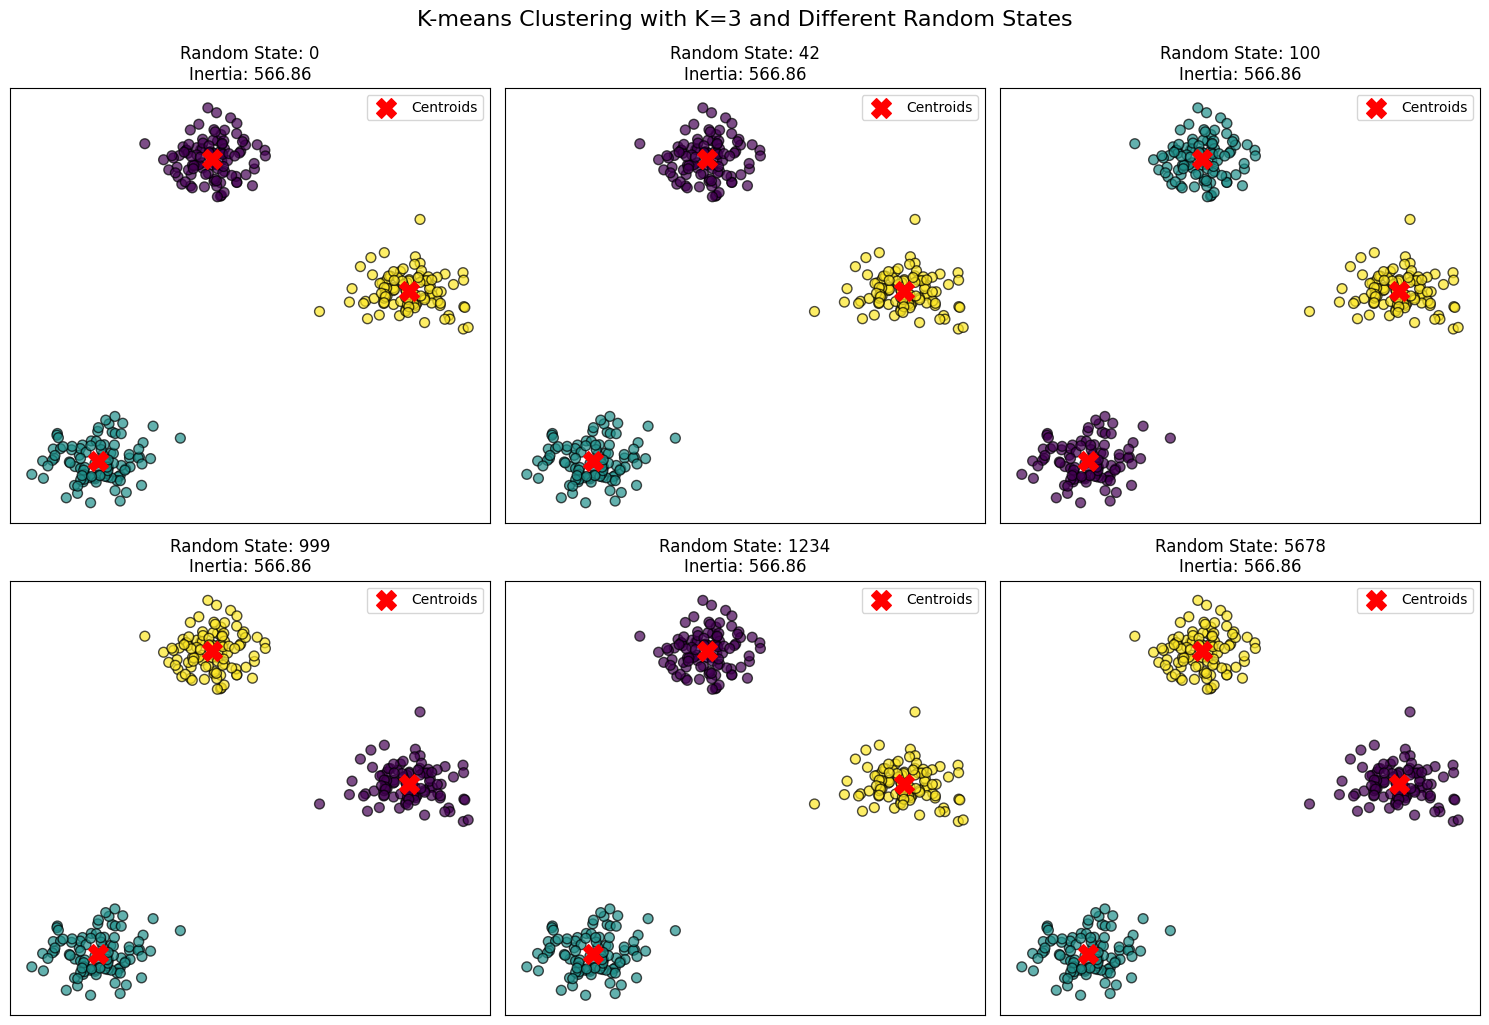


Random State Effect Analysis:
Random State	Inertia		Difference from mean
-------------------------------------------------------
0		566.86		+0.00
42		566.86		+0.00
100		566.86		+0.00
999		566.86		+0.00
1234		566.86		+0.00
5678		566.86		+0.00

Mean inertia: 566.86
Standard deviation: 0.0000

Observations on Random State Effect:
1. Random state affects the initial centroid placement
2. Different initializations can lead to different final cluster assignments
3. This results in slightly different inertia values
4. The variability is relatively small due to:
   - Well-separated clusters in this dataset
   - K-means++ initialization (default) which is smarter than random
5. For reproducible results, always set random_state
6. In real applications, you might run K-means multiple times with different
   random states and choose the best result


In [5]:
# Exercise 6: Experiment with different random state values
print("Exercise 6: Effect of different random states on K-means")

random_states = [0, 42, 100, 999, 1234, 5678]
n_clusters = 3

plt.figure(figsize=(15, 10))

inertia_comparison = []

for i, random_state in enumerate(random_states, 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    inertia = kmeans.inertia_
    inertia_comparison.append(inertia)

    plt.subplot(2, 3, i)
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis',
                         edgecolor='k', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Random State: {random_state}\nInertia: {inertia:.2f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.suptitle(f'K-means Clustering with K={n_clusters} and Different Random States',
             y=1.02, fontsize=16)
plt.show()

# Analyze the effect of random state
print("\nRandom State Effect Analysis:")
print("Random State\tInertia\t\tDifference from mean")
print("-" * 55)
mean_inertia = np.mean(inertia_comparison)
for rs, inertia in zip(random_states, inertia_comparison):
    diff = inertia - mean_inertia
    print(f"{rs}\t\t{inertia:.2f}\t\t{diff:+.2f}")

print(f"\nMean inertia: {mean_inertia:.2f}")
print(f"Standard deviation: {np.std(inertia_comparison):.4f}")

print("\nObservations on Random State Effect:")
print("1. Random state affects the initial centroid placement")
print("2. Different initializations can lead to different final cluster assignments")
print("3. This results in slightly different inertia values")
print("4. The variability is relatively small due to:")
print("   - Well-separated clusters in this dataset")
print("   - K-means++ initialization (default) which is smarter than random")
print("5. For reproducible results, always set random_state")
print("6. In real applications, you might run K-means multiple times with different")
print("   random states and choose the best result")

Exercise 7: K-Means Clustering on Iris Dataset
Iris dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
True target names: ['setosa' 'versicolor' 'virginica']
True class distribution: [50 50 50]
Clustering Iris dataset with different K values:

K = 2:


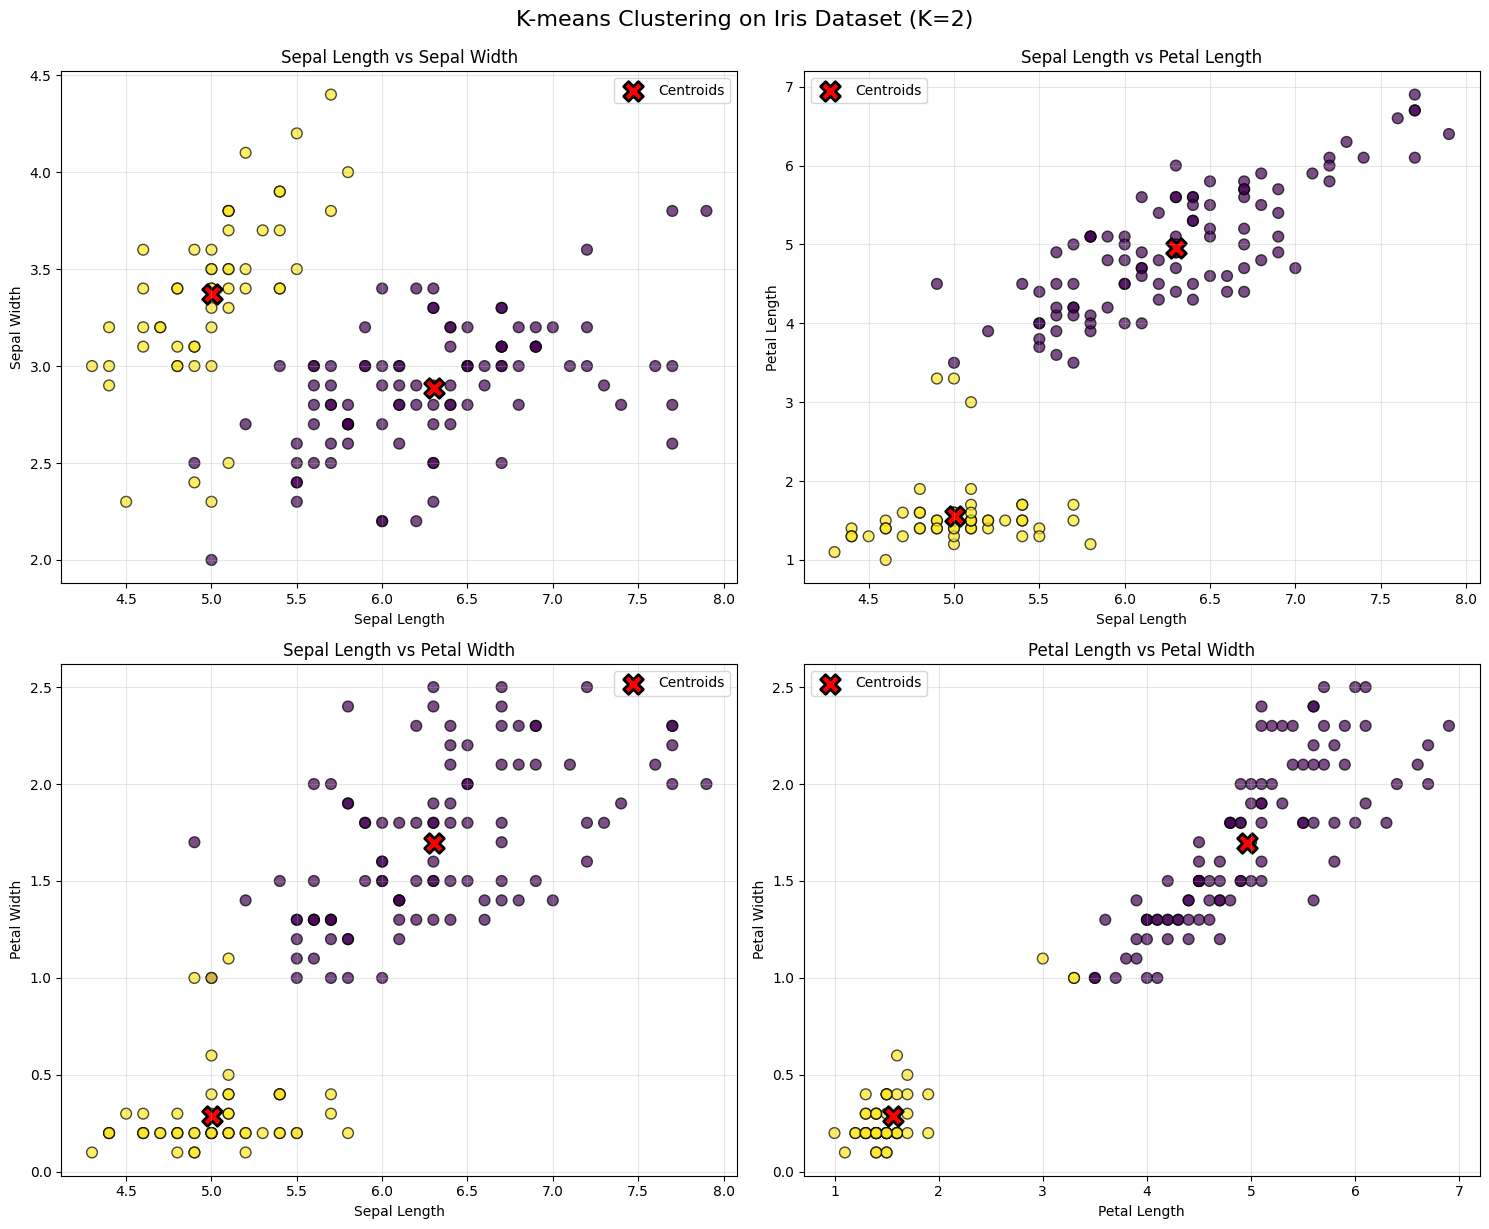

Results for K=2:
  - Inertia: 152.35
  - Silhouette Score: 0.681
  - Cluster distribution: [97 53]

K = 3:


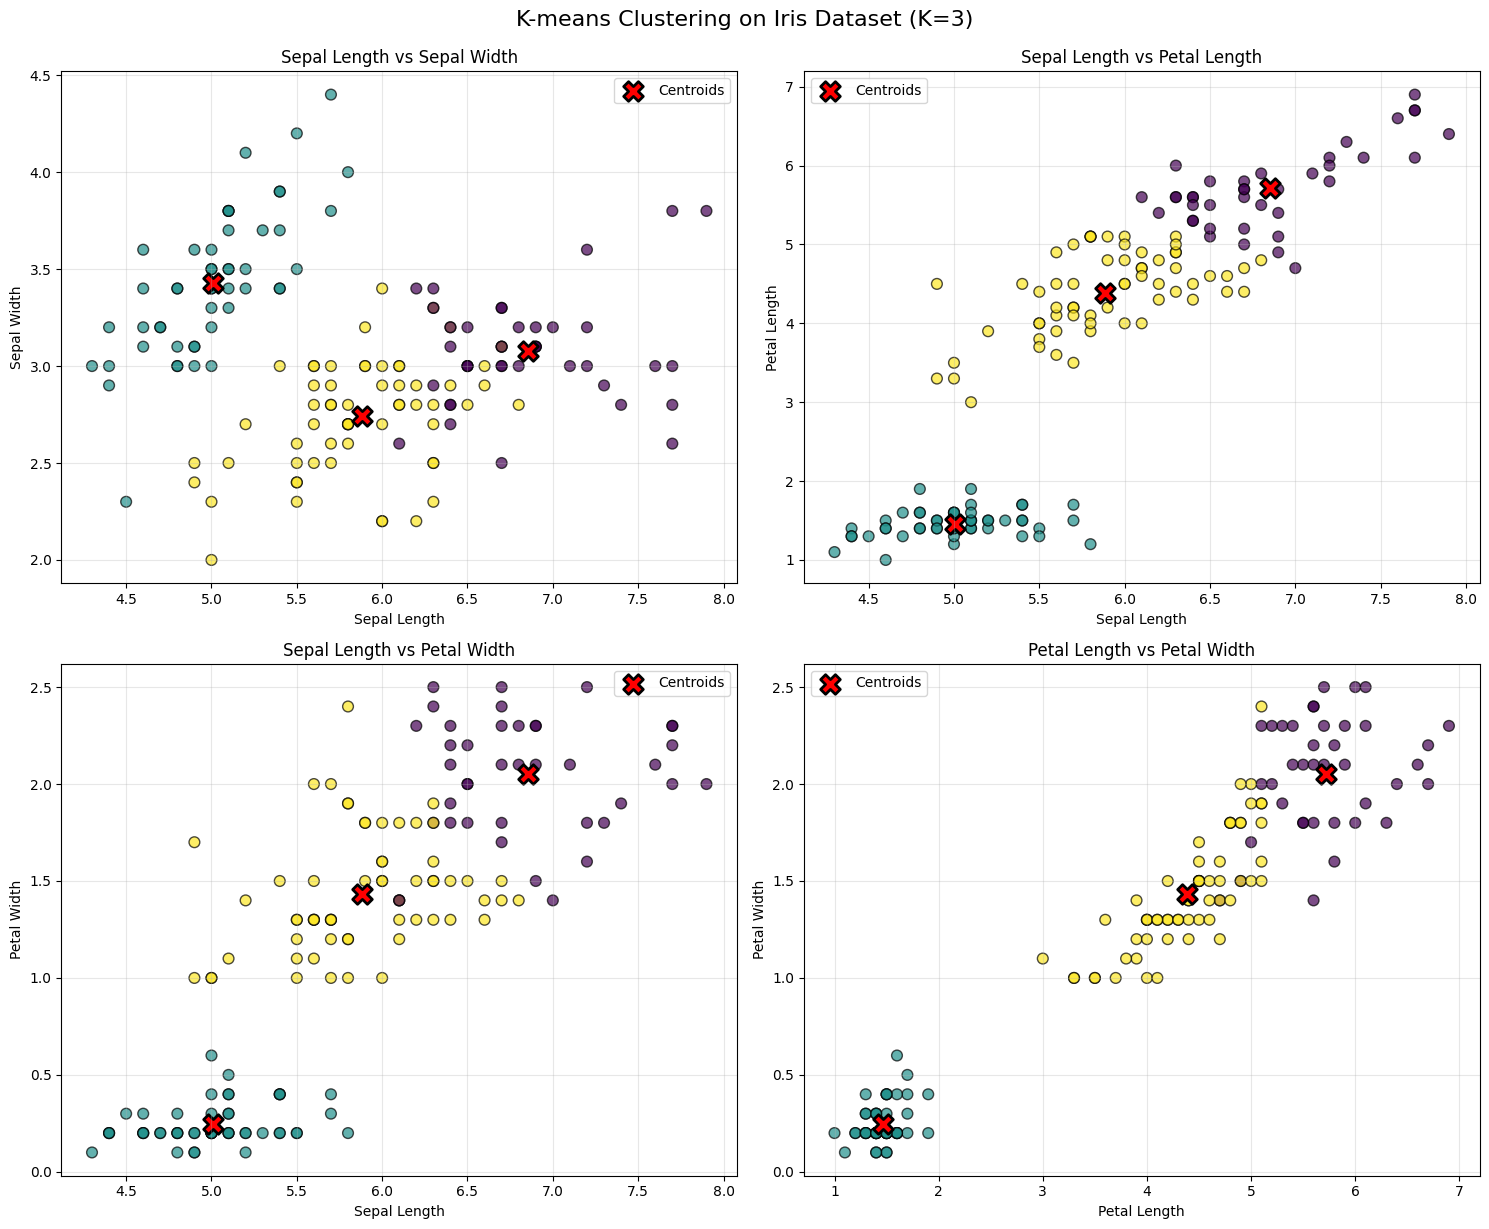

Results for K=3:
  - Inertia: 78.86
  - Silhouette Score: 0.551
  - Cluster distribution: [39 50 61]

K = 4:


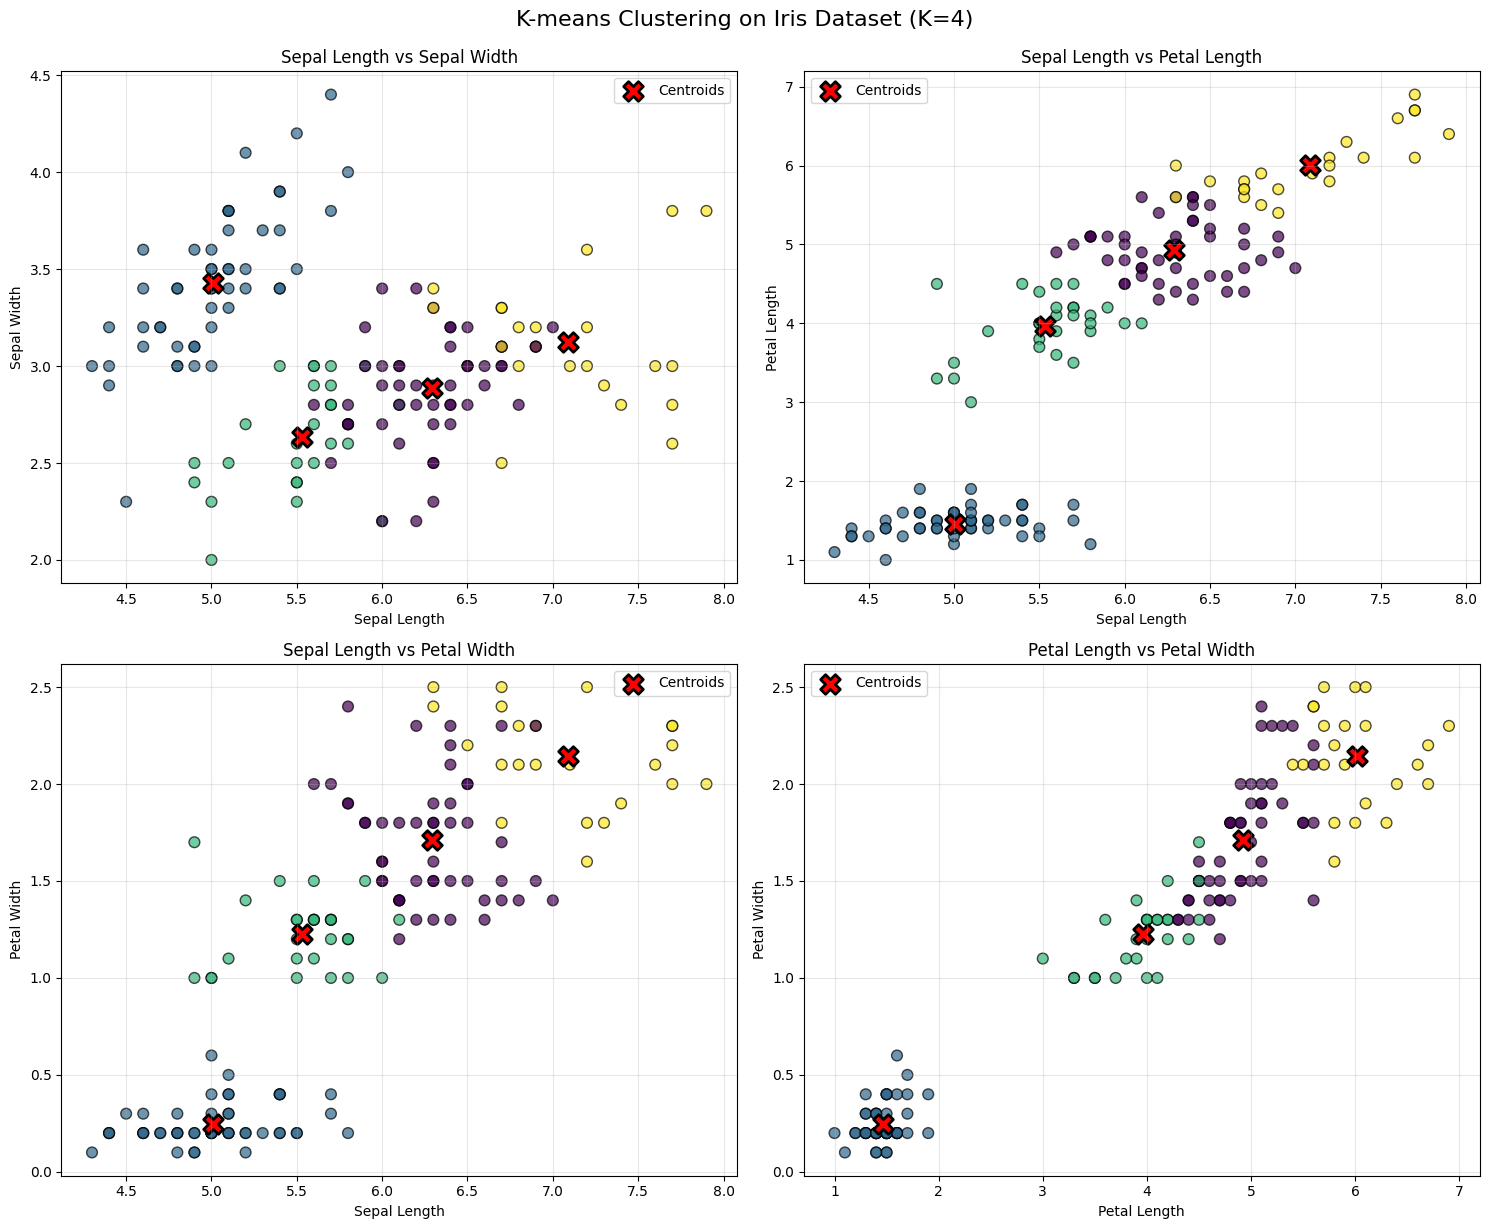

Results for K=4:
  - Inertia: 57.35
  - Silhouette Score: 0.498
  - Cluster distribution: [49 50 28 23]

K = 5:


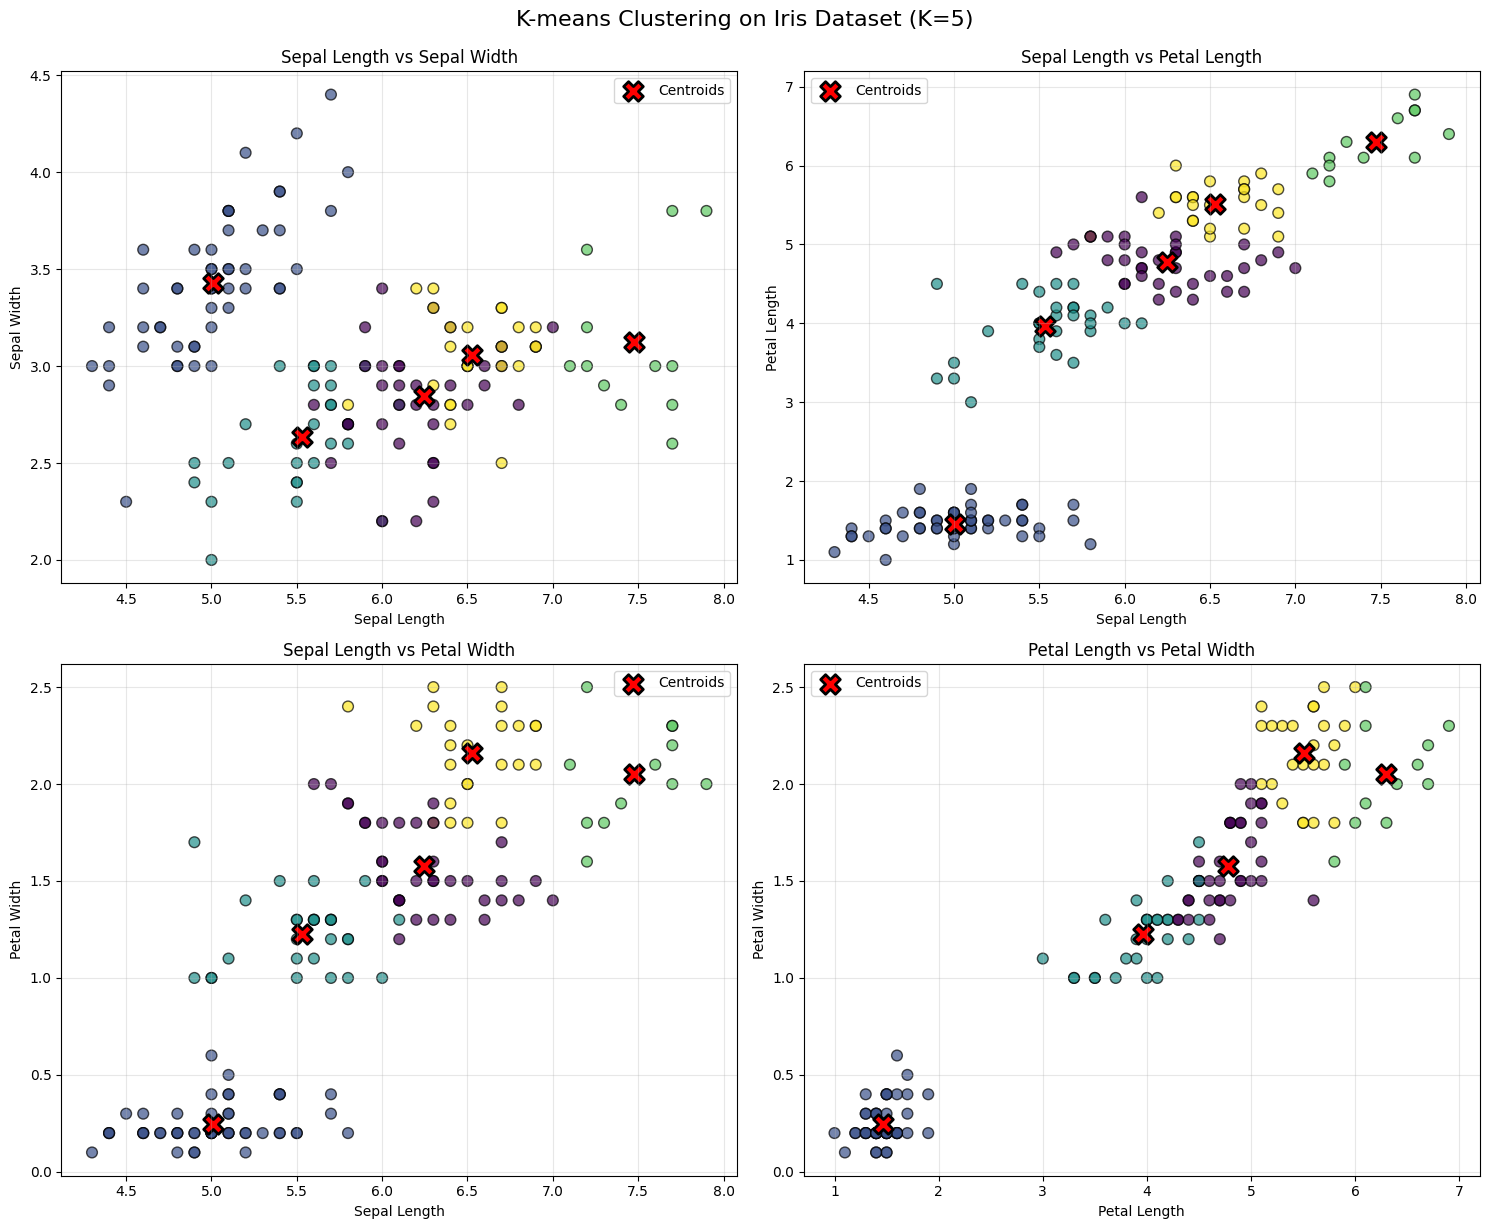

Results for K=5:
  - Inertia: 46.47
  - Silhouette Score: 0.493
  - Cluster distribution: [36 50 28 12 24]

K = 6:


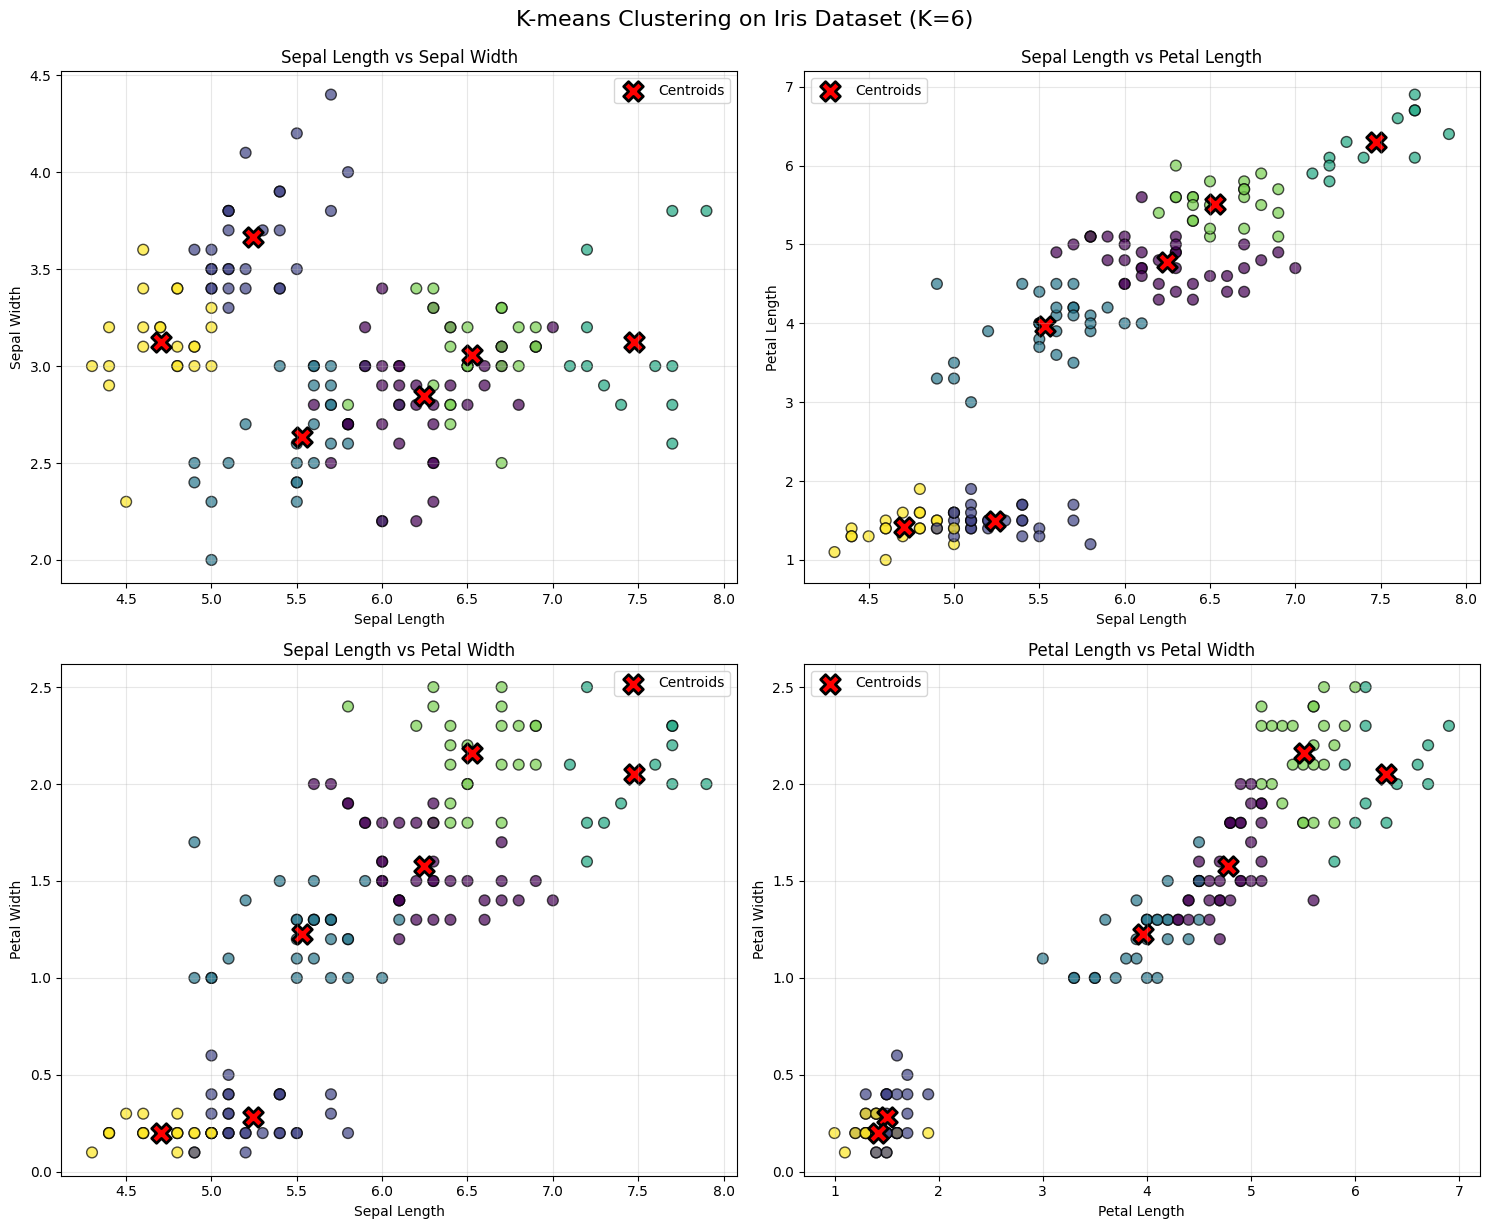

Results for K=6:
  - Inertia: 39.07
  - Silhouette Score: 0.368
  - Cluster distribution: [36 28 28 12 24 22]

K = 7:


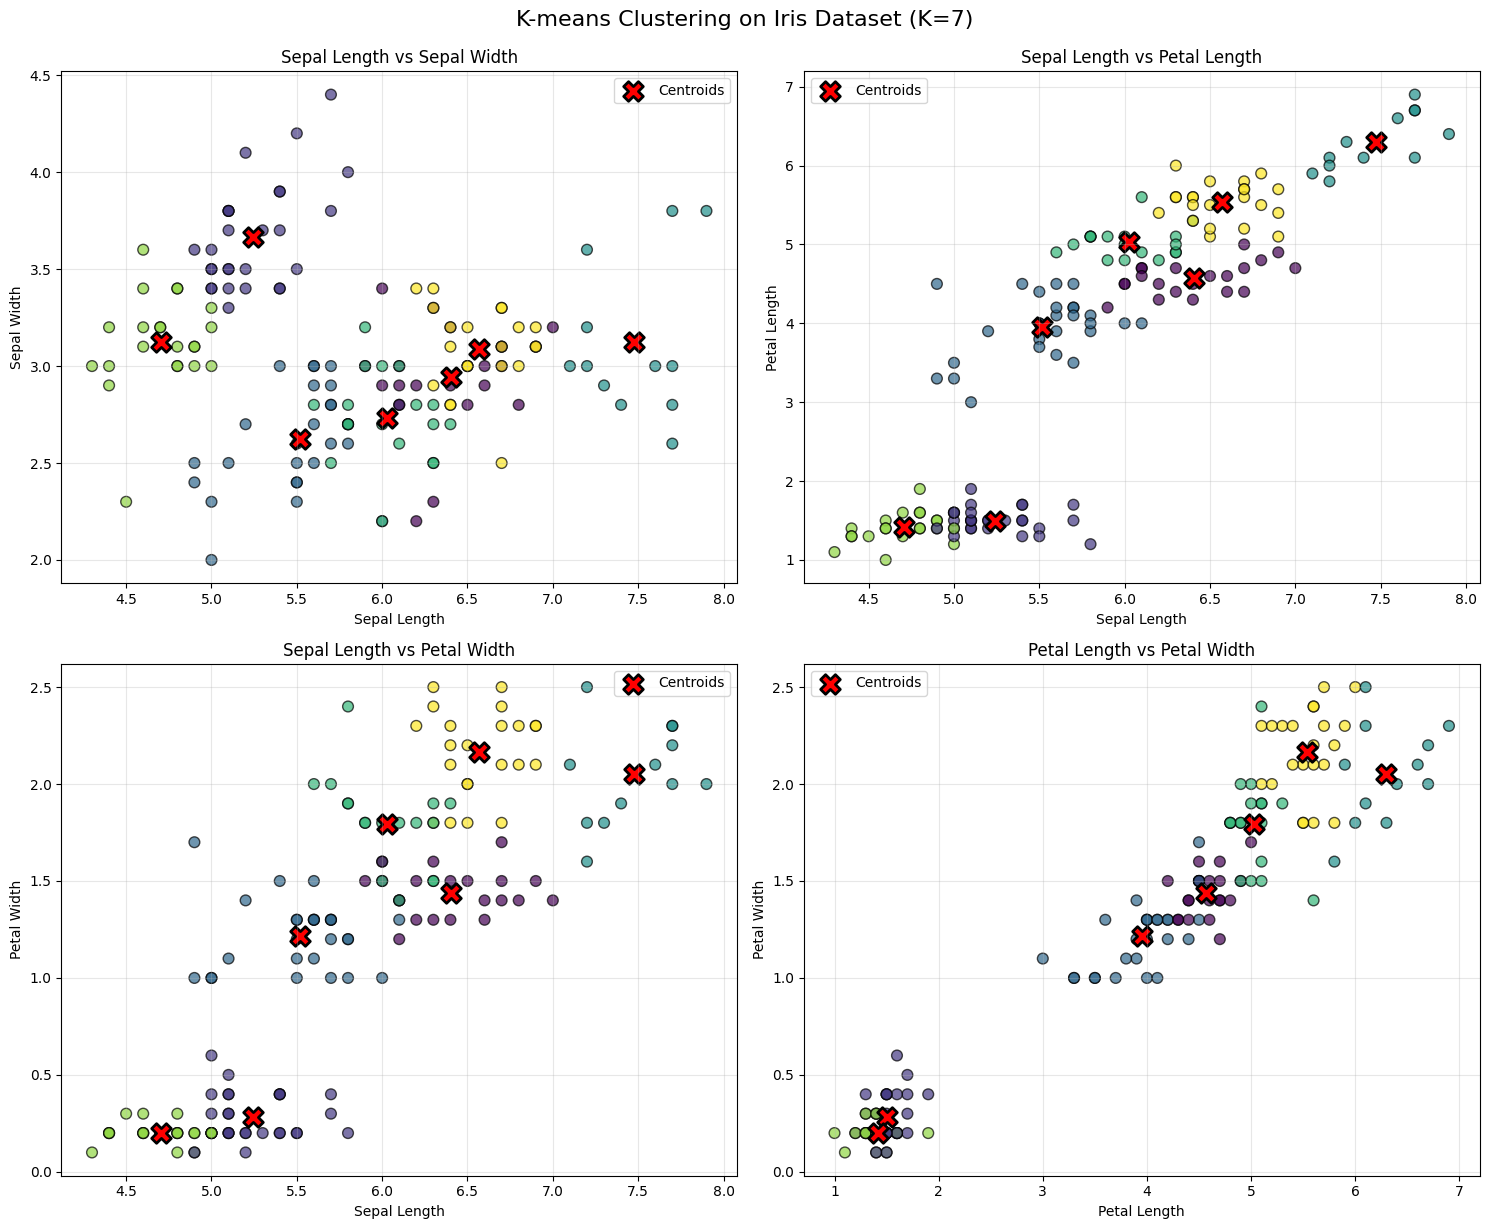

Results for K=7:
  - Inertia: 34.31
  - Silhouette Score: 0.354
  - Cluster distribution: [21 28 27 12 18 22 22]

Comparison of all clustering results on Iris dataset:
   K  Inertia  Silhouette
0  2  152.348       0.681
1  3   78.856       0.551
2  4   57.351       0.498
3  5   46.472       0.493
4  6   39.066       0.368
5  7   34.306       0.354

Optimal K based on silhouette score: 2 (score: 0.681)
Note: The true number of iris species is 3, which should correspond to K=3


In [6]:
# Exercise 7: K-Means on Iris dataset
print("Exercise 7: K-Means Clustering on Iris Dataset")

# Load the Iris dataset
iris = load_iris()
data_iris = iris.data
target_iris = iris.target
feature_names_iris = iris.feature_names
target_names_iris = iris.target_names

print(f"Iris dataset shape: {data_iris.shape}")
print(f"Feature names: {feature_names_iris}")
print(f"True target names: {target_names_iris}")
print(f"True class distribution: {np.bincount(target_iris)}")

# Enhanced function for Iris clustering visualization
def plot_iris_clustering(data, n_clusters, feature_names, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)

    # Create subplots for different feature combinations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # Feature combinations to plot (using first 4 features)
    feature_pairs = [(0, 1), (0, 2), (0, 3), (2, 3)]
    pair_names = [('Sepal Length', 'Sepal Width'),
                  ('Sepal Length', 'Petal Length'),
                  ('Sepal Length', 'Petal Width'),
                  ('Petal Length', 'Petal Width')]

    for idx, ((i, j), (x_name, y_name)) in enumerate(zip(feature_pairs, pair_names)):
        scatter = axes[idx].scatter(data[:, i], data[:, j], c=labels,
                                   cmap='viridis', edgecolor='k', s=60, alpha=0.7)
        axes[idx].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j],
                         c='red', marker='X', s=200, label='Centroids',
                         edgecolor='black', linewidth=2)
        axes[idx].set_xlabel(x_name)
        axes[idx].set_ylabel(y_name)
        axes[idx].set_title(f'{x_name} vs {y_name}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle(f'K-means Clustering on Iris Dataset (K={n_clusters})', y=1.02, fontsize=16)
    plt.show()

    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(data, labels)

    print(f"Results for K={n_clusters}:")
    print(f"  - Inertia: {inertia:.2f}")
    print(f"  - Silhouette Score: {silhouette_avg:.3f}")
    print(f"  - Cluster distribution: {np.bincount(labels)}")

    return kmeans, labels

# Plot with different numbers of clusters
N = [2, 3, 4, 5, 6, 7]
iris_results = {}
iris_metrics = []

print("Clustering Iris dataset with different K values:")
print("=" * 60)

for n in N:
    print(f"\nK = {n}:")
    kmeans, labels = plot_iris_clustering(data_iris, n_clusters=n,
                                        feature_names=feature_names_iris,
                                        random_state=random_state_value)
    iris_results[n] = {'kmeans': kmeans, 'labels': labels}

    # Store metrics for comparison
    silhouette_avg = silhouette_score(data_iris, labels)
    iris_metrics.append({
        'K': n,
        'Inertia': kmeans.inertia_,
        'Silhouette': silhouette_avg
    })

# Compare all results
metrics_df = pd.DataFrame(iris_metrics)
print("\nComparison of all clustering results on Iris dataset:")
print(metrics_df.round(3))

# Find optimal K based on silhouette score
best_k_idx = metrics_df['Silhouette'].idxmax()
best_k = metrics_df.loc[best_k_idx, 'K']
best_silhouette = metrics_df.loc[best_k_idx, 'Silhouette']

print(f"\nOptimal K based on silhouette score: {best_k} (score: {best_silhouette:.3f})")
print("Note: The true number of iris species is 3, which should correspond to K=3")

Exercise 8: K-Means Assumptions Demonstration


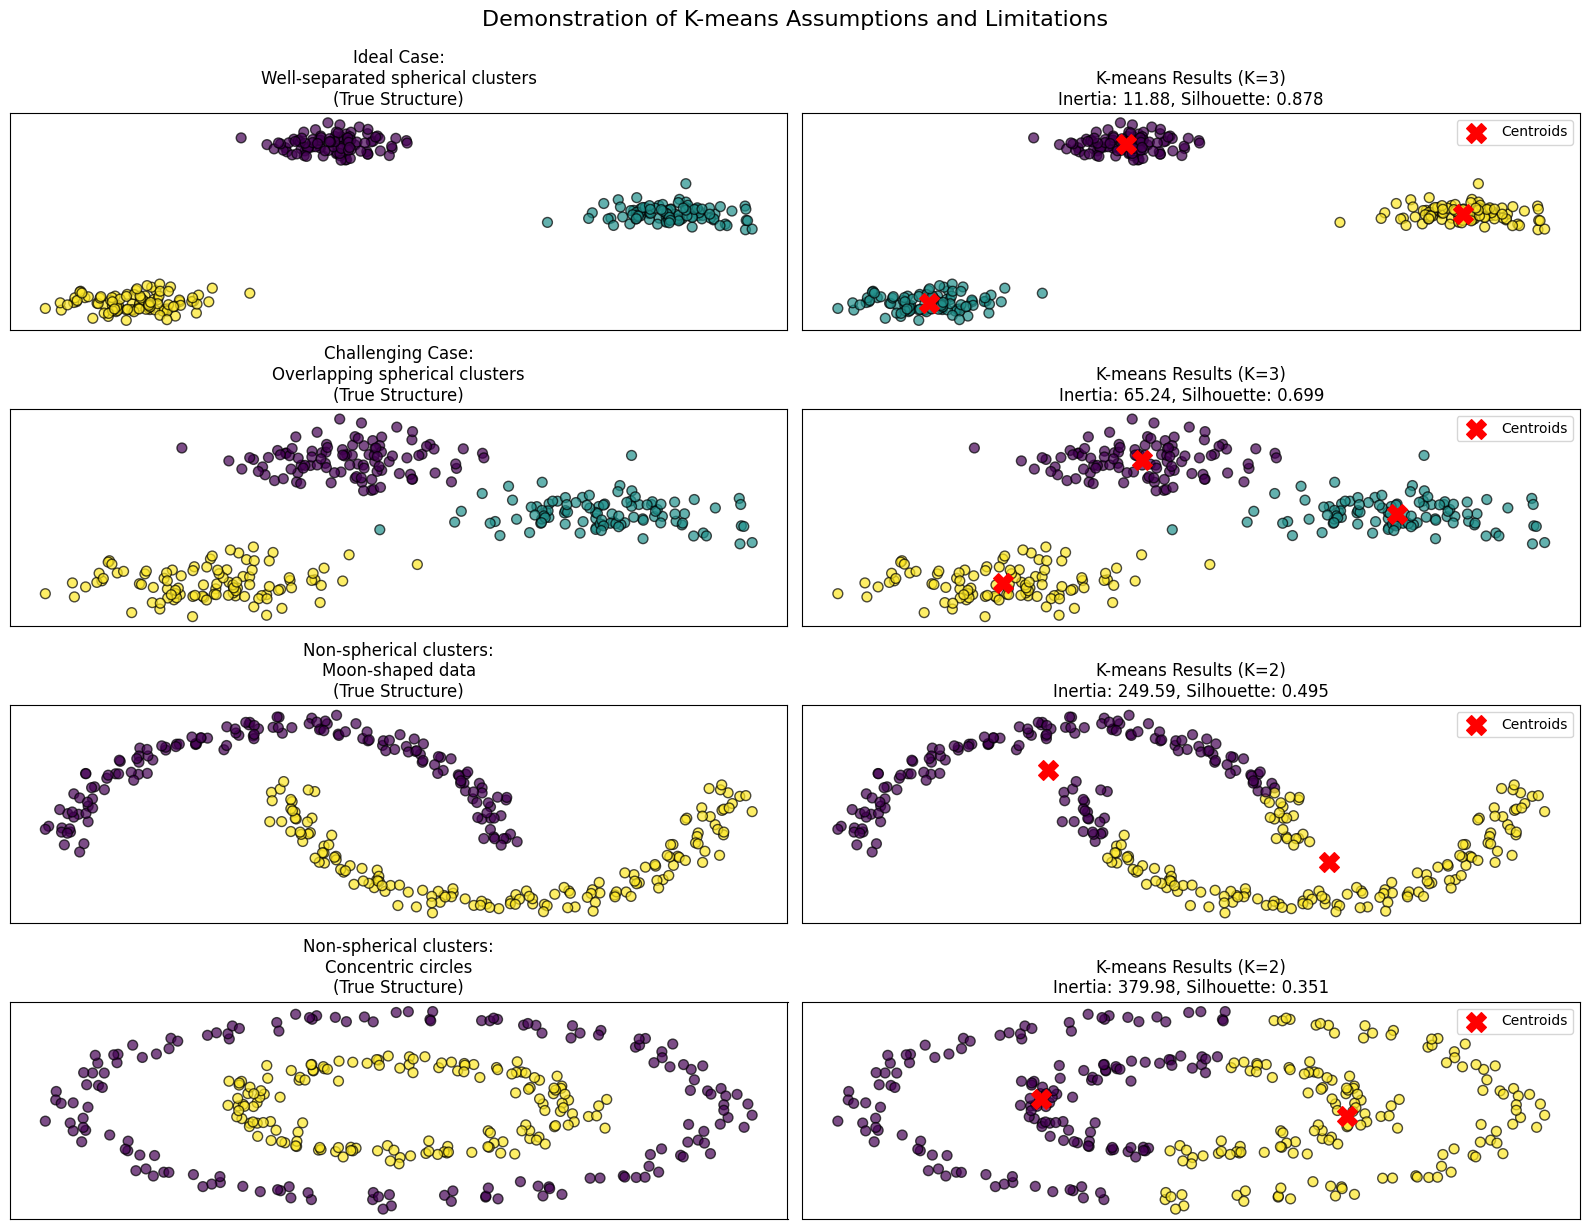


K-MEANS ASSUMPTIONS AND LIMITATIONS:
1. SPHERICAL CLUSTERS ASSUMPTION:
   ✓ Works well with spherical, well-separated clusters
   ✗ Struggles with non-spherical shapes (moons, circles)

2. SIMILAR CLUSTER SIZES:
   ✓ Works best when clusters have similar sizes
   ✗ May create artificial boundaries for varying sizes

3. CONVEX SHAPES:
   ✓ Excellent for convex cluster shapes
   ✗ Cannot handle concave or complex shapes

4. NUMBER OF CLUSTERS (K):
   ✗ Must specify K in advance
   ✓ Elbow method and silhouette analysis can help

5. SENSITIVITY TO OUTLIERS:
   ✗ Sensitive to outliers
   ✓ Centroid-based approach can be influenced by extreme values

RECOMMENDATIONS:
- Use K-means for: Well-separated, spherical clusters
- Consider other algorithms for: Complex shapes, varying densities
- Always: Scale your data, try multiple random states


In [7]:
# Exercise 8: Demonstration of k-means assumptions
print("Exercise 8: K-Means Assumptions Demonstration")

from sklearn.datasets import make_blobs, make_moons, make_circles

# Create different datasets to test k-means assumptions
np.random.seed(42)
datasets = {
    'Ideal Case:\nWell-separated spherical clusters':
        make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42),

    'Challenging Case:\nOverlapping spherical clusters':
        make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42),

    'Non-spherical clusters:\nMoon-shaped data':
        make_moons(n_samples=300, noise=0.05, random_state=42),

    'Non-spherical clusters:\nConcentric circles':
        make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
}

# Apply k-means to each dataset and analyze results
plt.figure(figsize=(16, 12))

for i, (title, (X, y_true)) in enumerate(datasets.items(), 1):
    # Standardize the data for fair comparison
    X_scaled = StandardScaler().fit_transform(X)

    # Determine appropriate number of clusters
    if 'moon' in title.lower() or 'circle' in title.lower():
        n_clusters = 2
    else:
        n_clusters = 3

    # Apply k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)

    # Calculate metrics
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, y_pred)

    # Plot original data (true structure)
    plt.subplot(4, 2, 2*i-1)
    scatter_true = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true,
                              cmap='viridis', edgecolor='k', s=50, alpha=0.7)
    plt.title(f'{title}\n(True Structure)')
    plt.xticks([])
    plt.yticks([])
    plt.grid(True, alpha=0.3)

    # Plot k-means results
    plt.subplot(4, 2, 2*i)
    scatter_pred = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred,
                              cmap='viridis', edgecolor='k', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Results (K={n_clusters})\nInertia: {inertia:.2f}, Silhouette: {sil_score:.3f}')
    plt.legend()
    plt.xticks([])
    plt.yticks([])
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Demonstration of K-means Assumptions and Limitations', y=1.02, fontsize=16)
plt.show()

print("\nK-MEANS ASSUMPTIONS AND LIMITATIONS:")
print("=" * 50)
print("1. SPHERICAL CLUSTERS ASSUMPTION:")
print("   ✓ Works well with spherical, well-separated clusters")
print("   ✗ Struggles with non-spherical shapes (moons, circles)")
print()
print("2. SIMILAR CLUSTER SIZES:")
print("   ✓ Works best when clusters have similar sizes")
print("   ✗ May create artificial boundaries for varying sizes")
print()
print("3. CONVEX SHAPES:")
print("   ✓ Excellent for convex cluster shapes")
print("   ✗ Cannot handle concave or complex shapes")
print()
print("4. NUMBER OF CLUSTERS (K):")
print("   ✗ Must specify K in advance")
print("   ✓ Elbow method and silhouette analysis can help")
print()
print("5. SENSITIVITY TO OUTLIERS:")
print("   ✗ Sensitive to outliers")
print("   ✓ Centroid-based approach can be influenced by extreme values")
print()
print("RECOMMENDATIONS:")
print("- Use K-means for: Well-separated, spherical clusters")
print("- Consider other algorithms for: Complex shapes, varying densities")
print("- Always: Scale your data, try multiple random states")

Advanced Analysis: Finding Optimal K using Multiple Methods
Analysis for Synthetic Blobs Dataset:
K	Inertia		Silhouette	WCSS Reduction
-------------------------------------------------------
2	5763.46		0.705		-
3	566.86		0.848		90.2%
4	497.03		0.676		12.3%
5	428.21		0.496		13.8%
6	375.07		0.517		12.4%
7	308.20		0.358		17.8%
8	272.41		0.363		11.6%


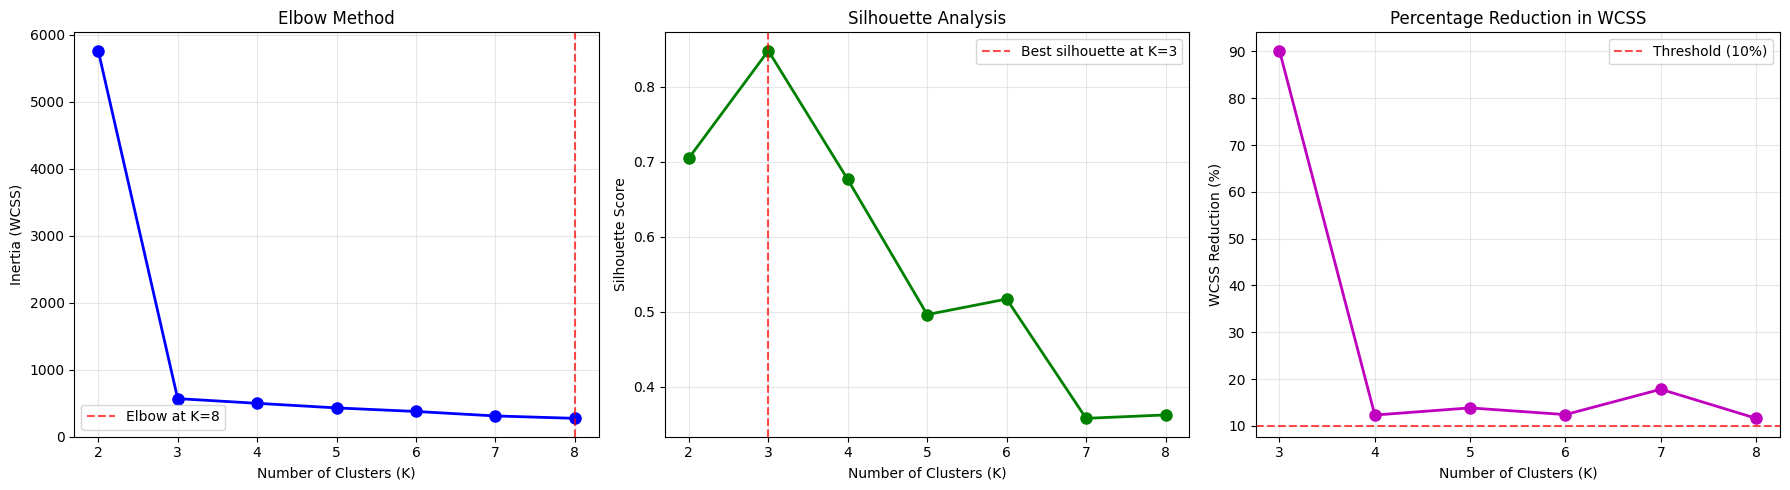


Optimal K Suggestions:
Elbow method: K = 8
Silhouette method: K = 3

Analysis for Iris Dataset:
K	Inertia		Silhouette	WCSS Reduction
-------------------------------------------------------
2	152.35		0.681		-
3	78.86		0.551		48.2%
4	57.35		0.498		27.3%
5	46.47		0.493		19.0%
6	39.07		0.368		15.9%
7	34.31		0.354		12.2%
8	30.48		0.345		11.2%


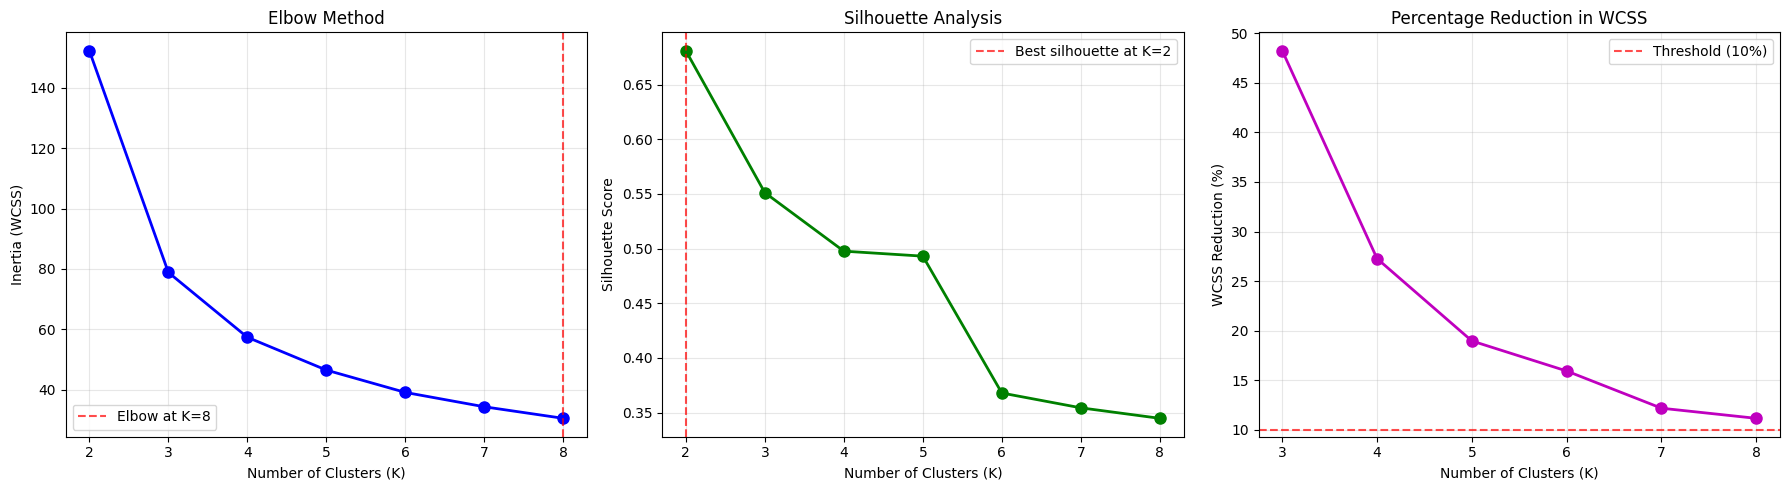


Optimal K Suggestions:
Elbow method: K = 8
Silhouette method: K = 2

Final Recommendations:
Synthetic data: Optimal K is likely 3 (matches true structure)
Iris data: Optimal K is likely 3 (matches true number of species)


In [9]:
# Advanced analysis for finding optimal number of clusters
print("Advanced Analysis: Finding Optimal K using Multiple Methods")

def comprehensive_k_analysis(data, max_k=10):
    """Comprehensive analysis to find optimal K using multiple methods"""

    k_range = range(2, max_k + 1)
    inertias = []
    sil_scores = []

    print("K\tInertia\t\tSilhouette\tWCSS Reduction")
    print("-" * 55)

    previous_inertia = None
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)

        inertia = kmeans.inertia_
        sil_score = silhouette_score(data, labels)

        inertias.append(inertia)
        sil_scores.append(sil_score)

        # Calculate percentage reduction in WCSS
        if previous_inertia is not None:
            reduction = ((previous_inertia - inertia) / previous_inertia) * 100
            print(f"{k}\t{inertia:.2f}\t\t{sil_score:.3f}\t\t{reduction:.1f}%")
        else:
            print(f"{k}\t{inertia:.2f}\t\t{sil_score:.3f}\t\t-")

        previous_inertia = inertia

    # Find suggested optimal K
    # Method 1: Elbow method (find point where reduction slows)
    reductions = [((inertias[i-1] - inertias[i]) / inertias[i-1]) * 100
                 for i in range(1, len(inertias))]

    # Simple elbow detection: find where reduction drops below threshold
    threshold = 10  # percentage
    elbow_k = None
    for i, reduction in enumerate(reductions):
        if reduction < threshold:
            elbow_k = i + 2  # +2 because we start from k=2
            break
    if elbow_k is None:
        elbow_k = k_range[-1]  # if no clear elbow, use max K

    # Method 2: Best silhouette score
    best_sil_k = sil_scores.index(max(sil_scores)) + 2

    # Plot comprehensive analysis
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Elbow curve
    ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
    ax1.axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7,
                label=f'Elbow at K={elbow_k}')
    ax1.set_xlabel('Number of Clusters (K)')
    ax1.set_ylabel('Inertia (WCSS)')
    ax1.set_title('Elbow Method')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Silhouette scores
    ax2.plot(k_range, sil_scores, 'go-', linewidth=2, markersize=8)
    ax2.axvline(x=best_sil_k, color='red', linestyle='--', alpha=0.7,
                label=f'Best silhouette at K={best_sil_k}')
    ax2.set_xlabel('Number of Clusters (K)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # WCSS reduction percentage
    ax3.plot(k_range[1:], reductions, 'mo-', linewidth=2, markersize=8)
    ax3.axhline(y=threshold, color='red', linestyle='--', alpha=0.7,
                label=f'Threshold ({threshold}%)')
    ax3.set_xlabel('Number of Clusters (K)')
    ax3.set_ylabel('WCSS Reduction (%)')
    ax3.set_title('Percentage Reduction in WCSS')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nOptimal K Suggestions:")
    print(f"Elbow method: K = {elbow_k}")
    print(f"Silhouette method: K = {best_sil_k}")

    return elbow_k, best_sil_k

print("Analysis for Synthetic Blobs Dataset:")
print("=" * 40)
elbow_k, sil_k = comprehensive_k_analysis(data, max_k=8)

print("\nAnalysis for Iris Dataset:")
print("=" * 40)
elbow_iris, sil_iris = comprehensive_k_analysis(data_iris, max_k=8)

print(f"\nFinal Recommendations:")
print(f"Synthetic data: Optimal K is likely 3 (matches true structure)")
print(f"Iris data: Optimal K is likely 3 (matches true number of species)")